## Graph (Network) Visualizations

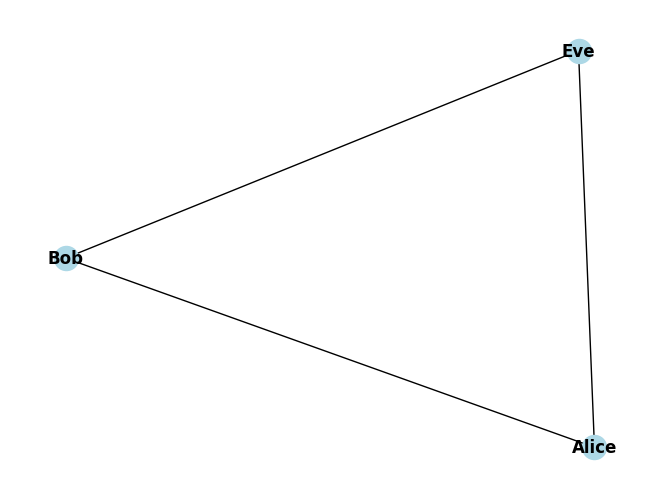

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# node link diagram

G = nx.Graph()
G.add_edges_from([("Alice", "Bob"), ("Alice", "Eve"), ("Bob", "Eve")])
nx.draw(G, with_labels=True, node_color='lightblue', font_weight='bold')
plt.show()



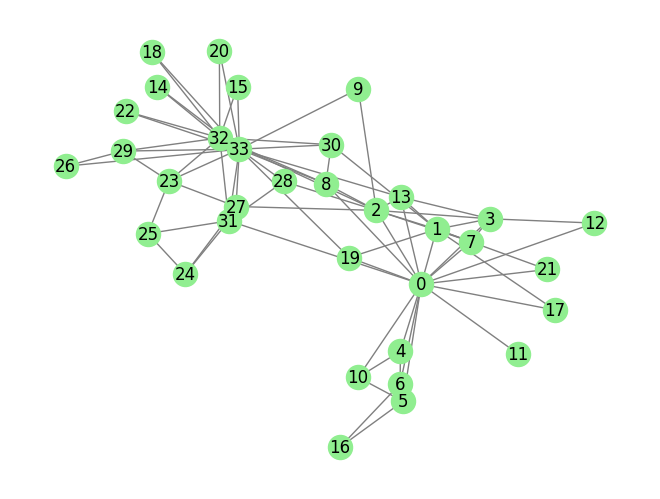

In [3]:
# force directed graph
G = nx.karate_club_graph()
pos = nx.spring_layout(G)  # Force-directed layout
nx.draw(G, pos, with_labels=True, node_color='lightgreen', edge_color='gray')
plt.show()

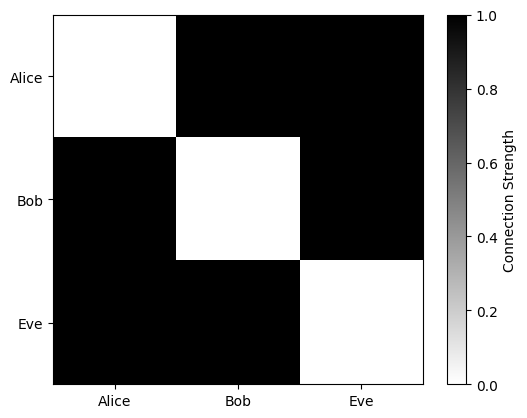

In [7]:
# adjacency matrix

adjacency_matrix = np.array([[0, 1, 1], [1, 0, 1], [1, 1, 0]])
plt.imshow(adjacency_matrix, cmap='binary', interpolation='none')
plt.colorbar(label="Connection Strength")
plt.xticks(range(3), ["Alice", "Bob", "Eve"])
plt.yticks(range(3), ["Alice", "Bob", "Eve"])
plt.show()

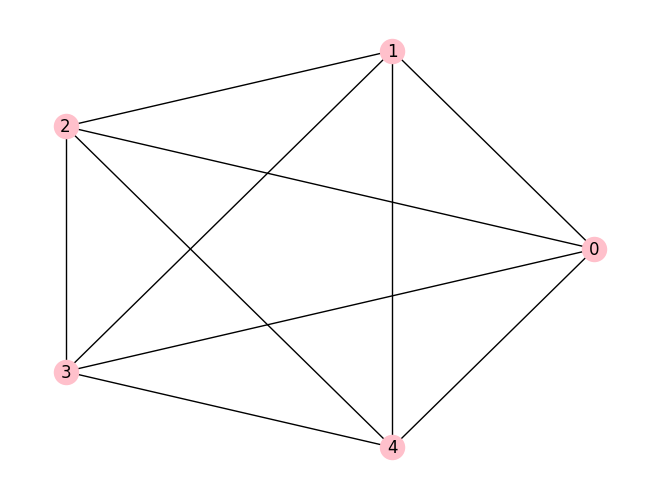

In [8]:
# circular layout graph

G = nx.complete_graph(5)
nx.draw_circular(G, with_labels=True, node_color='pink')
plt.show()

In [9]:
# tree graph

from anytree import Node, RenderTree

root = Node("Root")
child1 = Node("Child1", parent=root)
child2 = Node("Child2", parent=root)
Node("Grandchild1", parent=child1)
Node("Grandchild2", parent=child1)
Node("Grandchild3", parent=child2)

for pre, fill, node in RenderTree(root):
    print(f"{pre}{node.name}")

Root
├── Child1
│   ├── Grandchild1
│   └── Grandchild2
└── Child2
    └── Grandchild3


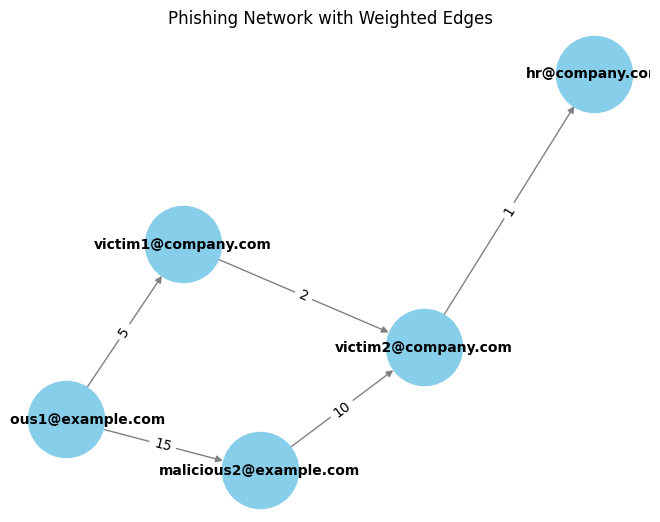

In [11]:
# cybersecurity example

# Enhanced data with weights
phishing_data = [
    ("malicious1@example.com", "victim1@company.com", 5),
    ("malicious2@example.com", "victim2@company.com", 10),
    ("victim1@company.com", "victim2@company.com", 2),
    ("malicious1@example.com", "malicious2@example.com", 15),
    ("victim2@company.com", "hr@company.com", 1),
]

# Build a weighted directed graph
G = nx.DiGraph()
for sender, receiver, weight in phishing_data:
    G.add_edge(sender, receiver, weight=weight)

# Draw graph
pos = nx.spring_layout(G)
weights = nx.get_edge_attributes(G, 'weight')
nx.draw(
    G, pos, with_labels=True, node_size=3000, node_color='skyblue',
    edge_color='gray', font_size=10, font_weight='bold'
)
nx.draw_networkx_edge_labels(G, pos, edge_labels=weights)
plt.title("Phishing Network with Weighted Edges")
plt.show()

In [12]:
degree_centrality = nx.degree_centrality(G)
print("Degree Centrality:")
for node, score in degree_centrality.items():
    print(f"{node}: {score}")

Degree Centrality:
malicious1@example.com: 0.5
victim1@company.com: 0.5
malicious2@example.com: 0.5
victim2@company.com: 0.75
hr@company.com: 0.25


In [13]:
betweenness_centrality = nx.betweenness_centrality(G, weight='weight')
print("Betweenness Centrality:")
for node, score in betweenness_centrality.items():
    print(f"{node}: {score}")

Betweenness Centrality:
malicious1@example.com: 0.0
victim1@company.com: 0.16666666666666666
malicious2@example.com: 0.0
victim2@company.com: 0.25
hr@company.com: 0.0


In [14]:
closeness_centrality = nx.closeness_centrality(G)
print("Closeness Centrality:")
for node, score in closeness_centrality.items():
    print(f"{node}: {score}")

Closeness Centrality:
malicious1@example.com: 0.0
victim1@company.com: 0.25
malicious2@example.com: 0.25
victim2@company.com: 0.5625
hr@company.com: 0.5


In [15]:
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)
print("Eigenvector Centrality:")
for node, score in eigenvector_centrality.items():
    print(f"{node}: {score}")


Eigenvector Centrality:
malicious1@example.com: 6.3216841846079825e-09
victim1@company.com: 4.937235348178822e-06
malicious2@example.com: 4.937235348178822e-06
victim2@company.com: 0.0038510498932636758
hr@company.com: 0.9999925846554898


In [16]:
from networkx.algorithms.community import greedy_modularity_communities

communities = greedy_modularity_communities(G)
for i, community in enumerate(communities, 1):
    print(f"Community {i}: {list(community)}")



Community 1: ['victim1@company.com', 'malicious1@example.com', 'malicious2@example.com']
Community 2: ['hr@company.com', 'victim2@company.com']


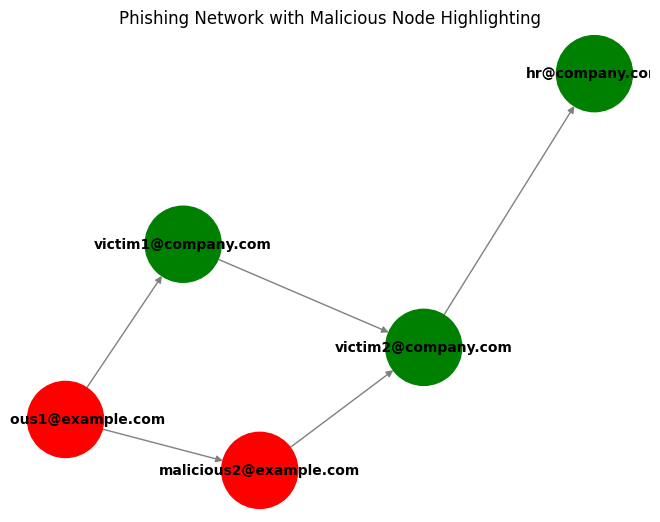

In [17]:
colors = ['red' if 'malicious' in node else 'green' for node in G.nodes()]
nx.draw(
    G, pos, with_labels=True, node_size=3000, node_color=colors,
    edge_color='gray', font_size=10, font_weight='bold'
)
plt.title("Phishing Network with Malicious Node Highlighting")
plt.show()